<a href="https://colab.research.google.com/github/ElsaMolina/Challenge_AluraStore/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Challenge Alura Store Data Science**
---

## **Introducción**

Este informe tiene como objetivo evaluar el desempeño de las cuatro tiendas de la cadena **Alura Store**, con el fin de ayudar al Sr. Juan a decidir cuál de ellas debería vender.

Se analizaron cinco métricas clave:

- Ingresos totales por tienda
- Ventas por categoría de productos
- Calificación promedio de tienda
- Productos más y menos vendidos
- Costo promedio de envío

Este análisis busca identificar las fortalezas y debilidades de cada tienda para determinar cuál presenta el mejor equilibrio entre eficiencia operativa y demanda de productos.

---

### Importación de datos



In [157]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


# **1. Análisis de facturación**



## Desglose de los ingresos totales por tienda:

In [143]:
import pandas as pd
tienda = pd.read_csv(url)
#IngresoT = Ingreso Total

IngresoT_Tienda1 = tienda["Precio"].sum()
IngresoT_Tienda2 = tienda2["Precio"].sum()
IngresoT_Tienda3 = tienda3["Precio"].sum()
IngresoT_Tienda4 = tienda4["Precio"].sum()

Ingresos_totales = (IngresoT_Tienda1 + IngresoT_Tienda2
                    + IngresoT_Tienda3 + IngresoT_Tienda4)

print(f"Desglose de los ingresos totales por tienda:")
print(f"Tienda 1: {IngresoT_Tienda1}")
print(f"Tienda 2: {IngresoT_Tienda2}")
print(f"Tienda 3: {IngresoT_Tienda3}")
print(f"Tienda 4: {IngresoT_Tienda4}")

print(f"El ingreso total de todas las tiendas: {Ingresos_totales}")

Desglose de los ingresos totales por tienda:
Tienda 1: 1150880400.0
Tienda 2: 1116343500.0
Tienda 3: 1098019600.0
Tienda 4: 1038375700.0
El ingreso total de todas las tiendas: 4403619200.0


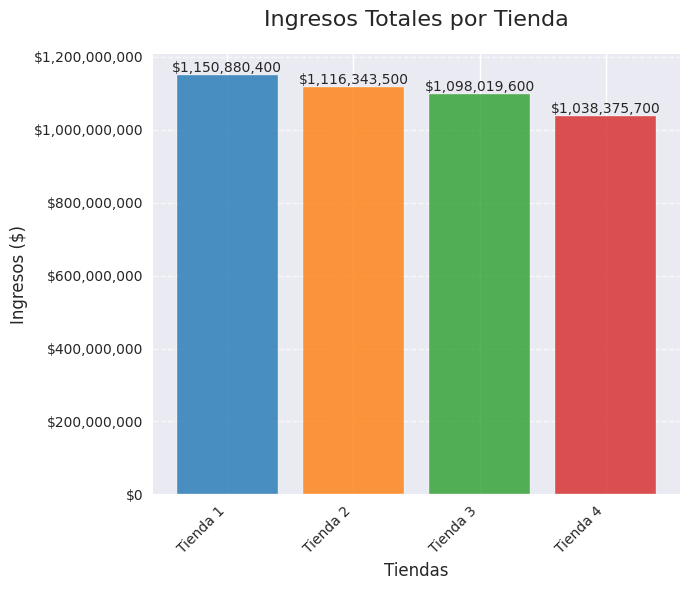

In [138]:
import matplotlib.pyplot as plt
import numpy as np

tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ingresos = [IngresoT_Tienda1, IngresoT_Tienda2, IngresoT_Tienda3, IngresoT_Tienda4]

plt.figure(figsize=(7, 6))
bars = plt.bar(tiendas, ingresos, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'], alpha=0.8)

plt.title('Ingresos Totales por Tienda', fontsize=16, pad=20)
plt.xlabel('Tiendas', fontsize=12)
plt.ylabel('Ingresos ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.gca().yaxis.set_major_formatter('${x:,.0f}')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:,.0f}',
             ha='center', va='bottom',
             fontsize=10)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


## Evolución Trimestral de Ventas Promedio Comparación por Tienda vs Promedio General:

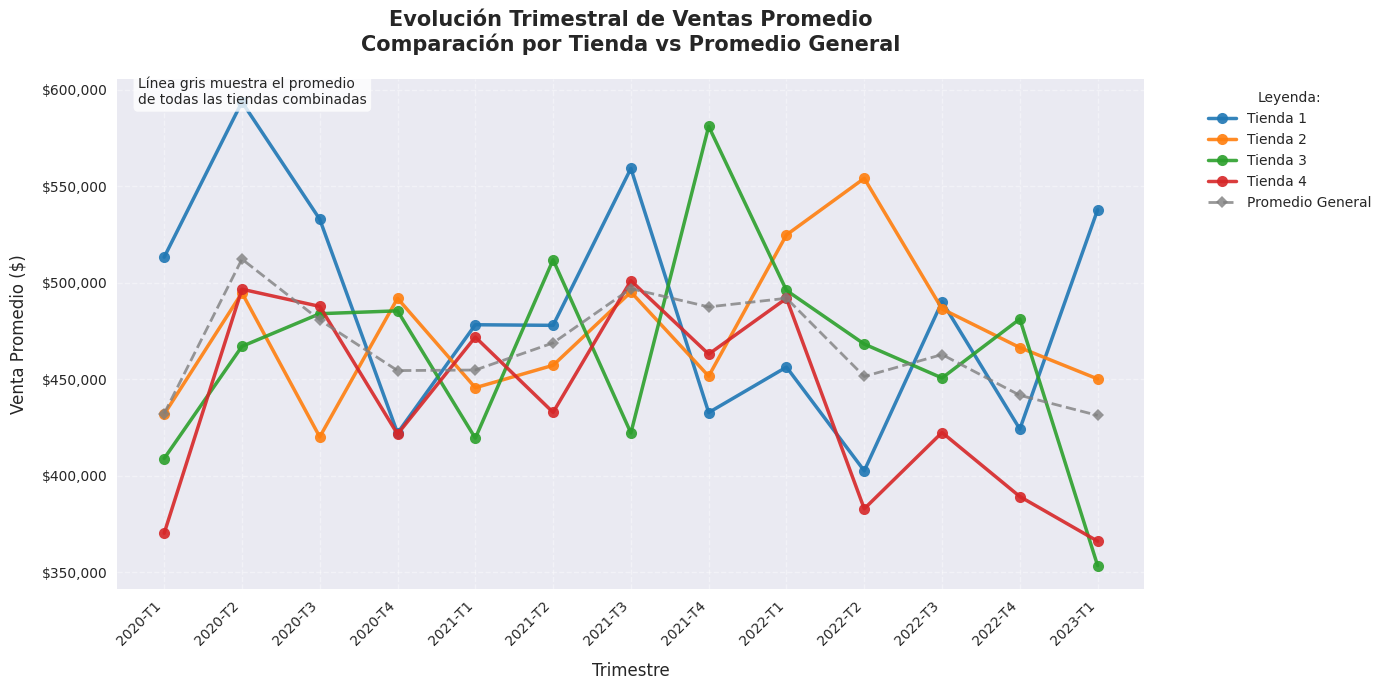

In [144]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.dates import DateFormatter

dfs = []
for i, df in enumerate([tienda, tienda2, tienda3, tienda4], 1):
    df['Tienda'] = f'Tienda {i}'
    dfs.append(df)

datos_completos = pd.concat(dfs)

# Procesamos las fechas en formato día/mes/año
datos_completos['Fecha de Compra'] = pd.to_datetime(
    datos_completos['Fecha de Compra'],
    format='%d/%m/%Y'
)

datos_completos['Año'] = datos_completos['Fecha de Compra'].dt.year
datos_completos['Trimestre'] = datos_completos['Fecha de Compra'].dt.quarter
datos_completos['Año-Trimestre'] = datos_completos['Año'].astype(str) + '-T' + datos_completos['Trimestre'].astype(str)

# Cálculo de promedios
ventas_trimestrales = datos_completos.groupby(['Tienda', 'Año-Trimestre'])['Precio'].mean().reset_index()
promedio_general = datos_completos.groupby('Año-Trimestre')['Precio'].mean().reset_index()

# Ordenamiento trimestral
orden_trimestres = sorted(ventas_trimestrales['Año-Trimestre'].unique())
ventas_trimestrales['Año-Trimestre'] = pd.Categorical(
    ventas_trimestrales['Año-Trimestre'],
    categories=orden_trimestres,
    ordered=True
)
ventas_trimestrales = ventas_trimestrales.sort_values(['Tienda', 'Año-Trimestre'])

# Configuración del gráfico
plt.figure(figsize=(14, 7))
colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Líneas por tienda
for i, tienda in enumerate(ventas_trimestrales['Tienda'].unique()):
    datos_tienda = ventas_trimestrales[ventas_trimestrales['Tienda'] == tienda]
    plt.plot(datos_tienda['Año-Trimestre'],
             datos_tienda['Precio'],
             marker='o',
             markersize=8,
             label=tienda,
             color=colores[i],
             linewidth=2.5,
             alpha=0.9)

# Línea de promedio general
plt.plot(promedio_general['Año-Trimestre'],
         promedio_general['Precio'],
         color='#7F7F7F',
         linestyle='--',
         linewidth=2,
         marker='D',
         markersize=6,
         label='Promedio General',
         alpha=0.8)

# Estilo
plt.title('Evolución Trimestral de Ventas Promedio\nComparación por Tienda vs Promedio General',
          fontsize=15, pad=20, fontweight='bold')
plt.xlabel('Trimestre', fontsize=12, labelpad=10)
plt.ylabel('Venta Promedio ($)', fontsize=12, labelpad=10)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(title='Leyenda:', bbox_to_anchor=(1.05, 1), loc='upper left', framealpha=1)
plt.gca().yaxis.set_major_formatter('${x:,.0f}')
plt.tight_layout()
plt.annotate('Línea gris muestra el promedio\nde todas las tiendas combinadas',
             xy=(0.02, 0.95),
             xycoords='axes fraction',
             fontsize=10,
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.show()



---


### **Análisis**

- La **TIENDA 1** registró la **mayor facturación** de las cuatro, con un total de **$1,150,880,400.00**.

- La **TIENDA 4** presentó la **facturación más baja**, con **$1,038,375,700.00**.

Esto representa una diferencia de **$112,504,700.00** entre la tienda con mayores ingresos y la de menores ingresos.

- Las **TIENDA 2** y **TIENDA 3** mantuvieron ingresos cercanos al promedio general durante el periodo analizado.

---



# **2. Ventas por categoría**

## Productos vendidos por categoría en cada tienda:
Ilustrado en una tabla por Tienda.

In [148]:
'''
Creeamos una tabla que muestre los Poductos vendidos por Categoría en cada Tienda,
Ordenando las categorías de mayor a menor cantidad de productos vendidos.
'''
for i,df in enumerate([tienda, tienda2, tienda3, tienda4], 1):
  conteo = df.groupby("Categoría del Producto").size()\
            .reset_index(name=f'Tienda{i}_Cantidad')\
            .sort_values(by=f'Tienda{i}_Cantidad', ascending=False)
  print(f'\nTienda{i} - Productos por categoría:')
  print(conteo)


Tienda1 - Productos por categoría:
    Categoría del Producto  Tienda1_Cantidad
7                  Muebles               465
3             Electrónicos               448
5                 Juguetes               324
2        Electrodomésticos               312
1     Deportes y diversión               284
4   Instrumentos musicales               182
6                   Libros               173
0  Artículos para el hogar               171

Tienda2 - Productos por categoría:
    Categoría del Producto  Tienda2_Cantidad
7                  Muebles               442
3             Electrónicos               422
5                 Juguetes               313
2        Electrodomésticos               305
1     Deportes y diversión               275
4   Instrumentos musicales               224
6                   Libros               197
0  Artículos para el hogar               181

Tienda3 - Productos por categoría:
    Categoría del Producto  Tienda3_Cantidad
7                  Muebles           

## Productos por categoría en cada tienda
Ilustrada con un gráfico de barras agrupadas, la cual permite la comparación del desempeño de las tiendas una al lado de la otra en una misma categoría.

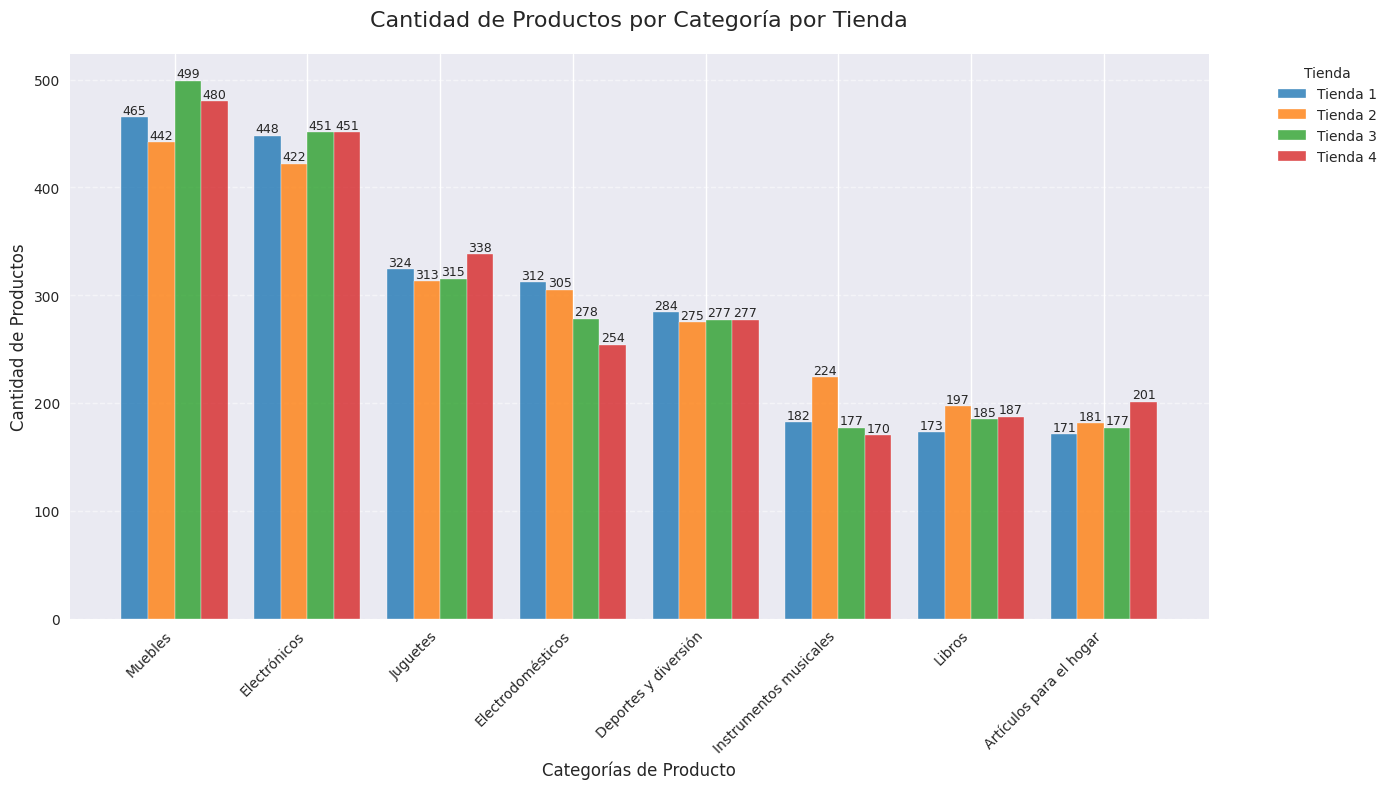

In [151]:
import matplotlib.pyplot as plt
import numpy as np

#Recopilando los datos por tiendas
datos_tiendas = []
for i, df in enumerate([tienda, tienda2, tienda3, tienda4], 1):
    conteo = df['Categoría del Producto'].value_counts().reset_index()
    conteo.columns = ['Categoría', f'Tienda {i}']
    datos_tiendas.append(conteo)

#Consolidamos los datos
df_final = datos_tiendas[0]
for df in datos_tiendas[1:]:
    df_final = pd.merge(df_final, df, on='Categoría', how='outer')
df_final = df_final.fillna(0)

#Ordenamos por categoría
df_final['Total'] = df_final.sum(axis=1, numeric_only=True)
df_final = df_final.sort_values('Total', ascending=False)
df_final = df_final.drop('Total', axis=1)

categorias = df_final['Categoría']
tiendas = [col for col in df_final.columns if col != 'Categoría']
x = np.arange(len(categorias))
ancho_barra = 0.2

#Configuración del gráfico
plt.figure(figsize=(14, 8))
colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

#Creamos barras para cada tienda
for i, tienda_col in enumerate(tiendas):
    desplazamiento = ancho_barra * i
    plt.bar(x + desplazamiento,
            df_final[tienda_col],
            width=ancho_barra,
            label=tienda_col,
            alpha=0.8,
            color=colores[i])

#Estilo del gráfico
plt.title('Cantidad de Productos por Categoría por Tienda', fontsize=16, pad=20)
plt.xlabel('Categorías de Producto', fontsize=12)
plt.ylabel('Cantidad de Productos', fontsize=12)
plt.xticks(x + ancho_barra*(len(tiendas)-1)/2, categorias, rotation=45, ha='right')
plt.legend(title='Tienda', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.5)

#Añadimos etiquetas de valor
for i, tienda_col in enumerate(tiendas):
    desplazamiento = ancho_barra * i
    for j, valor in enumerate(df_final[tienda_col]):
        if valor > 0:
            plt.text(x[j] + desplazamiento,
                    valor + 0.5,
                    int(valor),
                    ha='center',
                    va='bottom',
                    fontsize=9)

plt.tight_layout()
plt.show()


---
### **Análisis**

- **MUEBLES** y **ELECTRÓNICOS** son las dos categorías con mayor volumen de ventas en todas las tiendas.
  - Las tiendas que lideran en estas categorías son **TIENDA 3** y **TIENDA 4**.
  
- **LIBROS** y **ARTÍCULOS PARA EL HOGAR** son las categorías con menor volumen de ventas.
  - Las tiendas que destacan en estas categorías son **TIENDA 2** y **TIENDA 4**.


---

# **3. Calificación promedio de la tienda**


## Calificación promedio de cada tienda:
Ilustrado en una tabla

In [30]:
#Creamos el calculo del promedio de calificación de cada tienda.
calculo_promedio = pd.DataFrame({
    "Tienda": [f'Tienda {i}' for i in range(1, 5)],
    "Calificación promedio": [tienda["Calificación"].mean(),
                              tienda2["Calificación"].mean(),
                              tienda3["Calificación"].mean(),
                              tienda4["Calificación"].mean()]
                                                              })

#Ordenamos de mayor a menor calificación
calculo_promedio = calculo_promedio.sort_values("Calificación promedio", ascending=False).reset_index(drop=True)

print("\nCalificación promedio de cada tienda:")
print(calculo_promedio)


Calificación promedio de cada tienda:
     Tienda  Calificación promedio
0  Tienda 3               4.048326
1  Tienda 2               4.037304
2  Tienda 4               3.995759
3  Tienda 1               3.976685


## Calificación promedio de cada tienda:
Ilustrado en una gráfica de barras que compara las calificaciones de las tiendas de Más alta calificación a Más baja calificación.
También se aprecia una línea referencia que representa el promedio general, esta permite comparar cada tienda con el promedio.

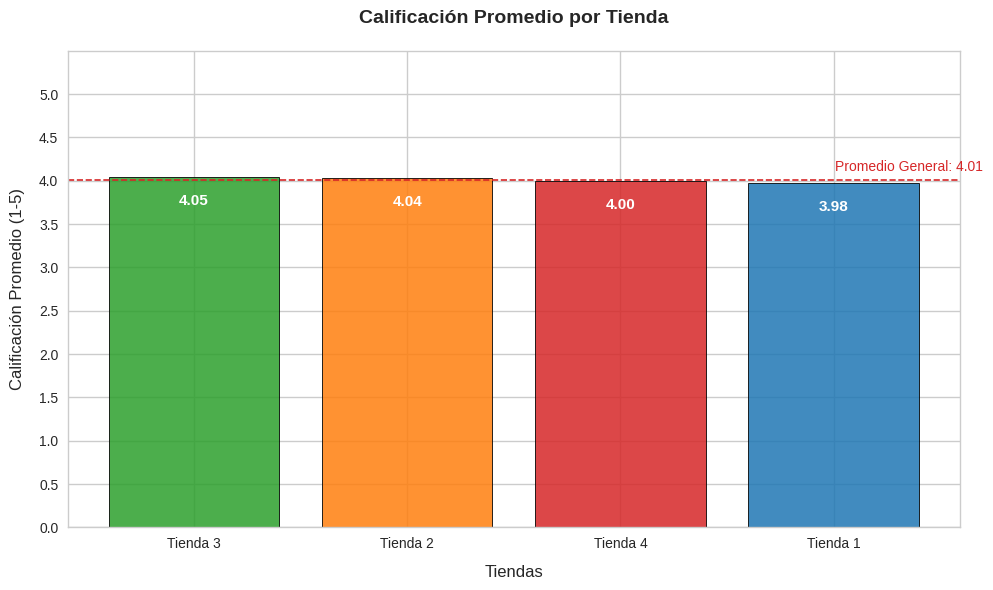


Calificación promedio de cada tienda:
     Tienda  Calificación promedio
0  Tienda 3               4.048326
1  Tienda 2               4.037304
2  Tienda 4               3.995759
3  Tienda 1               3.976685


In [152]:
import matplotlib.pyplot as plt
import numpy as np

# Configuramos el estilo
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 6))

#Ordenamos los datos
tiendas = calculo_promedio["Tienda"]
promedios = calculo_promedio["Calificación promedio"]

#Definimos colores
colores = [ '#2ca02c','#ff7f0e', '#d62728', '#1f77b4' ]

#Se crea el gráfico de barras
bars = plt.bar(tiendas, promedios, color=colores, alpha=0.85, edgecolor='black', linewidth=0.7)

# Personalización
plt.title('Calificación Promedio por Tienda', fontsize=14, pad=20, fontweight='bold')
plt.xlabel('Tiendas', fontsize=12, labelpad=10)
plt.ylabel('Calificación Promedio (1-5)', fontsize=12, labelpad=10)
plt.ylim(0, 5.5)

#Añadimos las etiquetas de valor con formato
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height - 0.2,
            f'{height:.2f}',
            ha='center', va='top',
            color='white',
            fontsize=11,
            fontweight='bold')

#Línea de referencia para el promedio general
promedio_general = promedios.mean()
plt.axhline(y=promedio_general, color='#D62728', linestyle='--', linewidth=1.2)
plt.text(len(tiendas)-0.3, promedio_general + 0.1,
        f'Promedio General: {promedio_general:.2f}',
        color='#D62728',
        ha='right',
        fontsize=10)

#Arreglando eje de las Y
plt.yticks(np.arange(0, 5.5, 0.5))

plt.tight_layout()
plt.show()

print("\nCalificación promedio de cada tienda:")
print(calculo_promedio)

---
### **Análisis**

El promedio general de **4.01** sugiere un buen desempeño general de la cadena, con un alto grado de satisfacción por parte de los clientes.

- **TIENDA 3** tiene la mejor calificación promedio: **4.05/5**, ligeramente por encima del promedio general.
- **TIENDA 1** tiene la calificación más baja: **3.98/5**, quedando por debajo del promedio general.
- **TIENDA 4** tiene la segunda calificación más baja: **4.00/5**, muy cercana al promedio.




---

# **4. Productos más y menos vendidos**

## El producto más y menos vendido de en cada tienda:

In [36]:
'''
Creamos la función para analizar los productos más y menos vendidos en cada tienda
Ordenamos de mayor a menor cantidad de productos vendidos.
'''

def productos_mas_menos_vendidos(tienda_df, numero_tienda):
  ventas_producto = tienda_df["Producto"].value_counts().reset_index()
  ventas_producto.columns = ["Producto", "Cantidad"]

  ventas_producto = ventas_producto.sort_values("Cantidad", ascending=False)

  #Para caluclar el producto más vendido y el producto menos vendido
  mas_vendido = ventas_producto.iloc[0]
  menos_vendido = ventas_producto.iloc[-1]

  print(f'\nAnálisis Tienda {numero_tienda}:')
  print(f'Producto más vendido: {mas_vendido ["Producto"]} con {mas_vendido["Cantidad"]} unidades')
  print(f'Producto menos vendido: {menos_vendido ["Producto"]} con {menos_vendido ["Cantidad"]} unidades')

  return ventas_producto

#Ahora aplicamos la función los datos
resultados ={}
for i, df in enumerate([tienda, tienda2, tienda3, tienda4], 1):
  resultados[f'Tienda {i}'] = productos_mas_menos_vendidos(df, i)


Análisis Tienda 1:
Producto más vendido: Microondas con 60 unidades
Producto menos vendido: Celular ABXY con 33 unidades

Análisis Tienda 2:
Producto más vendido: Iniciando en programación con 65 unidades
Producto menos vendido: Juego de mesa con 32 unidades

Análisis Tienda 3:
Producto más vendido: Kit de bancas con 57 unidades
Producto menos vendido: Bloques de construcción con 35 unidades

Análisis Tienda 4:
Producto más vendido: Cama box con 62 unidades
Producto menos vendido: Guitarra eléctrica con 33 unidades


## Los 20 proudctos menos vendidos y la distribución de venta por tienda.

En esta gráfica se aprecia los 20 productos menos venidos entre todas las tiendas y la distribución de venta de estos productos por tienda.
Esta gráfica permite visualizar que tiendas tiene una mayor venta de productos con poca demanda.

<Figure size 3600x3400 with 0 Axes>

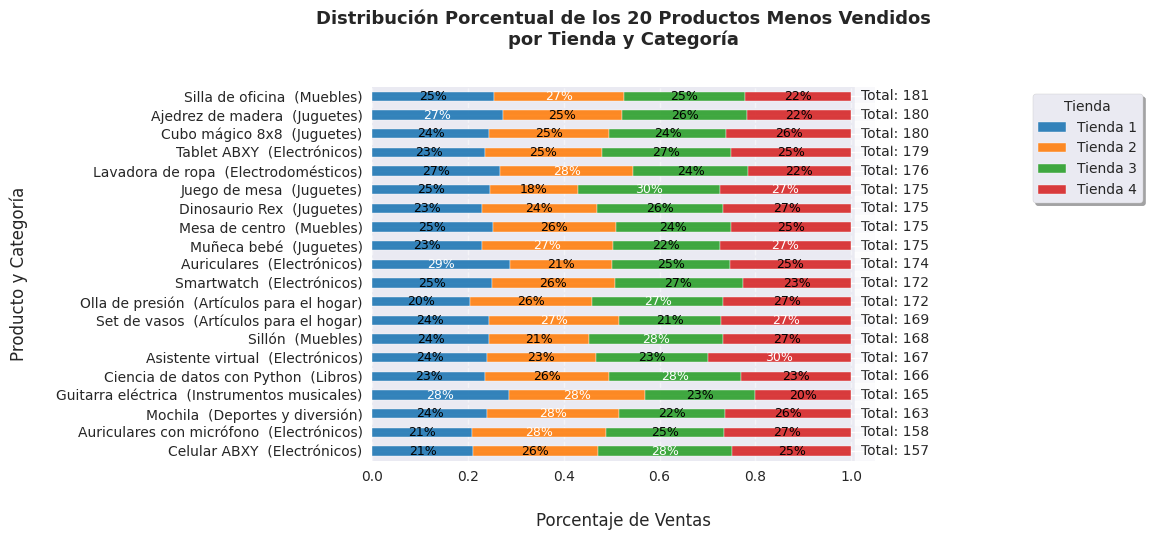

In [153]:
import pandas as pd
import matplotlib.pyplot as plt

#Obteniendo los 20 productos menos vendidos
productos_menos_vendidos = datos_completos['Producto'].value_counts().nsmallest(20).reset_index()
productos_menos_vendidos.columns = ['Producto', 'Ventas_Totales']

#Obteniendo la distribución por tienda y categoría
distribucion_tiendas = datos_completos[datos_completos['Producto'].isin(productos_menos_vendidos['Producto'])]
distribucion_tiendas = distribucion_tiendas.groupby(['Producto', 'Categoría del Producto', 'Tienda']).size().unstack().fillna(0)

#Calculando el porcentajes por producto
distribucion_porcentual = distribucion_tiendas.div(distribucion_tiendas.sum(axis=1), axis=0)

#Ordenamos por ventas totales de menor a mayor
distribucion_porcentual = distribucion_porcentual.loc[productos_menos_vendidos.set_index('Producto').sort_values('Ventas_Totales').index]

#Configuramos el gráfico
plt.figure(figsize=(36, 34))
plt.style.use('seaborn-v0_8')
plt.rcParams['font.family'] = 'DejaVu Sans'

#Creamos el gráfico de barras apiladas

ax = distribucion_porcentual.plot(kind='barh',
                                 stacked=True,
                                 color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'],
                                 alpha=0.9)


#personalización
plt.title('Distribución Porcentual de los 20 Productos Menos Vendidos\npor Tienda y Categoría',
          fontsize=13, pad=30, fontweight='bold')
plt.xlabel('Porcentaje de Ventas', fontsize=12, labelpad=20)
plt.ylabel('Producto y Categoría', fontsize=12, labelpad=20)

#Arreglando eje de las Y
y_labels = [f"{prod}  ({cat})" for prod, cat in distribucion_porcentual.index]
ax.set_yticklabels(y_labels, fontsize=10)

#Etiquetas de porcentaje y totales
for i, (idx, row) in enumerate(distribucion_porcentual.iterrows()):
    total_ventas = productos_menos_vendidos[productos_menos_vendidos['Producto'] == idx[0]]['Ventas_Totales'].values[0]

    # Etiqueta de total a la derecha
    ax.text(1.02, i,
           f'Total: {int(total_ventas)}',
           va='center',
           fontsize=10,
           bbox=dict(facecolor='white', alpha=0.7))

    # Etiquetas de porcentaje
    acumulado = 0
    for tienda, valor in row.items():
        if valor > 0.1:
            ax.text(acumulado + valor/2, i,
                   f'{valor:.0%}',
                   ha='center',
                   va='center',
                   color='white' if valor > 0.27 else 'black',
                   fontsize=9,
                  )
        acumulado += valor

#Leyenda
plt.legend(title='Tienda',
           bbox_to_anchor=(1.3, 1),
           loc='upper left',
           frameon=True,
           shadow=True)
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.subplots_adjust(right=1.1)
plt.show()

## Los 20 proudctos más vendidos y la distribución de venta por tienda.

En esta gráfica se aprecia los 20 productos más venidos entre todas las tiendas y la distribución de venta de estos productos por tienda.
Esta gráfica permite visualizar que tiendas tiene una mayor venta de productos en categorías clave.

<Figure size 3600x3400 with 0 Axes>

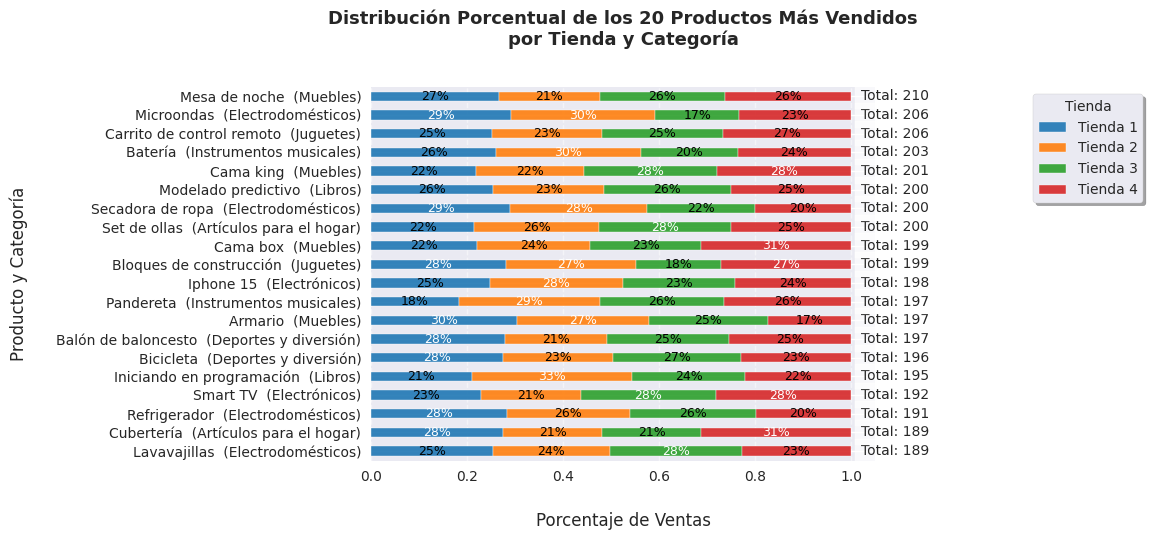

In [154]:
import pandas as pd
import matplotlib.pyplot as plt

#Obtenamos los 20 productos mas vendidos
productos_mas_vendidos = datos_completos['Producto'].value_counts().nlargest(20).reset_index()
productos_mas_vendidos.columns = ['Producto', 'Ventas_Totales']

#Ordenamos la distribución por tienda y categoría
distribucion_tiendas = datos_completos[datos_completos['Producto'].isin(productos_mas_vendidos['Producto'])]
distribucion_tiendas = distribucion_tiendas.groupby(['Producto', 'Categoría del Producto', 'Tienda']).size().unstack().fillna(0)

#Porcentajes por producto
distribucion_porcentual = distribucion_tiendas.div(distribucion_tiendas.sum(axis=1), axis=0)

#Ordenamos por ventas totales de menor a mayor
distribucion_porcentual = distribucion_porcentual.loc[productos_mas_vendidos.set_index('Producto').sort_values('Ventas_Totales').index]

#Configuración del gráfico
plt.figure(figsize=(36, 34))
plt.style.use('seaborn-v0_8')
plt.rcParams['font.family'] = 'DejaVu Sans'

#Creamos el gráfico de barras apiladas

ax = distribucion_porcentual.plot(kind='barh',
                                 stacked=True,
                                 color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'],
                                 alpha=0.9)


#Personalización
plt.title('Distribución Porcentual de los 20 Productos Más Vendidos\npor Tienda y Categoría',
          fontsize=13, pad=30, fontweight='bold')
plt.xlabel('Porcentaje de Ventas', fontsize=12, labelpad=20)
plt.ylabel('Producto y Categoría', fontsize=12, labelpad=20)

#Arreglando el eje Y
y_labels = [f"{prod}  ({cat})" for prod, cat in distribucion_porcentual.index]
ax.set_yticklabels(y_labels, fontsize=10)

#Etiquetas de porcentaje y totales
for i, (idx, row) in enumerate(distribucion_porcentual.iterrows()):
    total_ventas = productos_mas_vendidos[productos_mas_vendidos['Producto'] == idx[0]]['Ventas_Totales'].values[0]

    # Etiqueta de total a la derecha
    ax.text(1.02, i,
           f'Total: {int(total_ventas)}',
           va='center',
           fontsize=10,
           bbox=dict(facecolor='white', alpha=0.7))

    # Etiquetas de porcentaje
    acumulado = 0
    for tienda, valor in row.items():
        if valor > 0.1:  # Mostrar porcentajes > 10%
            ax.text(acumulado + valor/2, i,
                   f'{valor:.0%}',
                   ha='center',
                   va='center',
                   color='white' if valor > 0.27 else 'black',
                   fontsize=9,
                  )
        acumulado += valor

#Leyenda
plt.legend(title='Tienda',
           bbox_to_anchor=(1.3, 1),
           loc='upper left',
           frameon=True,
           shadow=True)
plt.grid(axis='x', linestyle='--', alpha=0.5)


plt.tight_layout()
plt.subplots_adjust(right=1.1)
plt.show()

---
### **Análisis**

**Categorías y artículos con mejor desempeño:**

- **Muebles:** Mesa de noche, Cama King, Armario
- **Electrodomésticos:** Microondas, Refrigerador
- **Artículos para el hogar:** Set de ollas

**Categorías y artículos con menor desempeño:**

- **Electrónicos:** Smart TV, iPhone 13, Asistente virtual
- **Juguetes:** Juego de mesa, Muñeca bebé



**TIENDA 2** muestra el **mejor desempeño general**, con ventas consistentes en múltiples categorías.

**TIENDA 4** presenta el **desempeño más bajo**, con menores ventas en categorías clave.


---

# 5. Envío promedio por tienda

## Costo promedio de envío por tienda
Ilustrado en una tabla

In [ ]:
#Creamos una funciones para calcular el costo promedio de envío
def calcular_costo_promedio_envio(df_tiendas):
  for i, df in enumerate(df_tiendas, start=1):
        df["Tienda"] = f'Tienda {i}'

  datos_completos = pd.concat(df_tiendas)
  costo_promedio = (datos_completos.groupby("Tienda")["Costo de envío"]
                    .mean()
                    .reset_index()
                    .sort_values("Costo de envío", ascending=False))

  costo_promedio.columns = ["Tienda", "Costo promedio de envío"]

  return costo_promedio

#Aplicamos la función a los datos
resultados = calcular_costo_promedio_envio([tienda, tienda2, tienda3, tienda4])
print(resultados)

     Tienda  Costo promedio de envío
0  Tienda 1             26018.609580
1  Tienda 2             25216.235693
2  Tienda 3             24805.680373
3  Tienda 4             23459.457167


## Costo promedio de envío por tienda
Ilustrado en una gráfica de barras en la que se muestra de mayor a menor los costos promedio de envío de cada tienda.
También se aprecia una línea referencia que representa el promedio general de costo de envío, esta permite comparar cada tienda con el promedio.

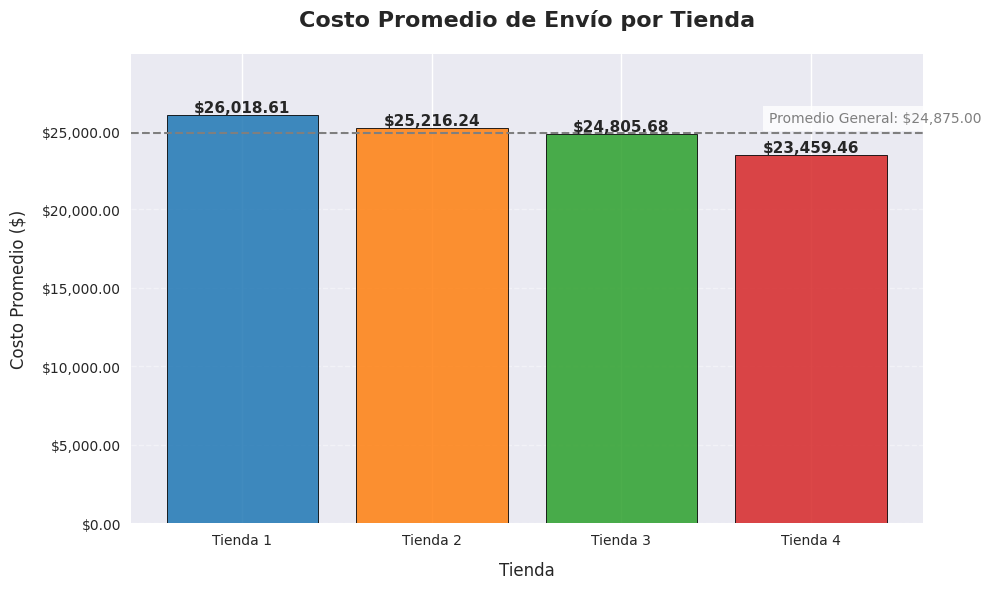

     Tienda  Costo promedio de envío
0  Tienda 1             26018.609580
1  Tienda 2             25216.235693
2  Tienda 3             24805.680373
3  Tienda 4             23459.457167


In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Estilo
plt.style.use('seaborn-v0_8')
plt.rcParams['font.family'] = 'DejaVu Sans'

# Definir colores
COLORES_TIENDAS = {
    'Tienda 1': '#1f77b4',
    'Tienda 2': '#ff7f0e',
    'Tienda 3': '#2ca02c',
    'Tienda 4': '#d62728'
}

# Función para calcular costos
def calcular_costo_promedio_envio(df_tiendas):
    for i, df in enumerate(df_tiendas, start=1):
        df["Tienda"] = f'Tienda {i}'

    datos_completos = pd.concat(df_tiendas)
    costo_promedio = (datos_completos.groupby("Tienda")["Costo de envío"]
                      .mean()
                      .reset_index()
                      .sort_values("Costo de envío", ascending=False))

    costo_promedio.columns = ["Tienda", "Costo promedio de envío"]
    return costo_promedio

#Aplicamos la función
resultados = calcular_costo_promedio_envio([tienda, tienda2, tienda3, tienda4])

#Creamos el gráfico de barras
plt.figure(figsize=(10, 6))

#Gráfico de barras con colores personalizados
bars = plt.bar(resultados["Tienda"],
               resultados["Costo promedio de envío"],
               color=[COLORES_TIENDAS[tienda] for tienda in resultados["Tienda"]],
               alpha=0.85,
               edgecolor='black',
               linewidth=0.7)

# Personalización
plt.title('Costo Promedio de Envío por Tienda', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Tienda', fontsize=12, labelpad=10)
plt.ylabel('Costo Promedio ($)', fontsize=12, labelpad=10)
plt.ylim(0, resultados["Costo promedio de envío"].max() * 1.15)

#Etiquetas de valor en dinero
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:,.2f}',
             ha='center',
             va='bottom',
             fontsize=11,
             fontweight='bold')

#Línea de promedio general
promedio_general = resultados["Costo promedio de envío"].mean()
plt.axhline(y=promedio_general, color='#7F7F7F', linestyle='--', linewidth=1.5)
plt.text(len(resultados)-0.1, promedio_general * 1.02,
         f'Promedio General: ${promedio_general:,.2f}',
         ha='right',
         va='bottom',
         color='#7F7F7F',
         fontsize=10,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

#Arreglando el eje Y
plt.gca().yaxis.set_major_formatter('${x:,.2f}')


plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

print(resultados)

---
### **Análisis**

El costo promedio general de envío entre las tiendas fue de **$24,875.00**.

- **TIENDA 1** tiene el costo promedio **más alto**, con **$26,018.61**, lo cual podría indicar problemas logísticos o menor eficiencia operativa.

- **TIENDA 4** tiene el costo promedio **más bajo**, con **$23,459.46**, posiblemente debido a una mejor gestión logística o acuerdos más favorables.





---



# **Interpretación**

- Aunque la **TIENDA 1** lidera en ingresos, enfrenta costos de envío elevados y tiene una calificación promedio ligeramente inferior. Se recomienda optimizar la logística y mejorar la experiencia del cliente.

- La **TIENDA 2** mantiene un buen equilibrio en todas las métricas clave, lo que la hace estable y sólida.

- La **TIENDA 3** destaca por su excelente calificación de clientes y un costo de envío cercano al promedio, aunque sus ingresos son un poco menores. Sería conveniente aprovechar su buena reputación para incrementar el volumen de ventas.

- La **TIENDA 4** demuestra eficiencia en costos de envío, pero sus ingresos y calificaciones están entre los más bajos. Esto representa una oportunidad de mejora, aunque también refleja un mayor nivel de riesgo.




---

# **Conclusión**

En cuanto a la decisión de **vender** una de las tiendas, se recomienda vender la **TIENDA 4**, por las siguientes razones:

- Genera la menor cantidad de ingresos.
- Tiene una de las calificaciones promedio más bajas, junto con Tienda 1, pero esta última genera mayores ingresos.
- Su bajo costo de envío puede ser atractivo para un comprador que desee invertir en mejorarla.
- Las categorías de productos con mayor venta son variadas, lo cual le otorga flexibilidad al comprador para decidir en qué especializarse.


En resumen, debido a sus bajos ingresos y calificaciones, el potencial de crecimiento de la **TIENDA 4** es más incierto en comparación con las demás tiendas.